<a href="https://colab.research.google.com/github/Arul-Nandhi/movie_analysis/blob/main/moviedata_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded.The first five rows: 
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama      

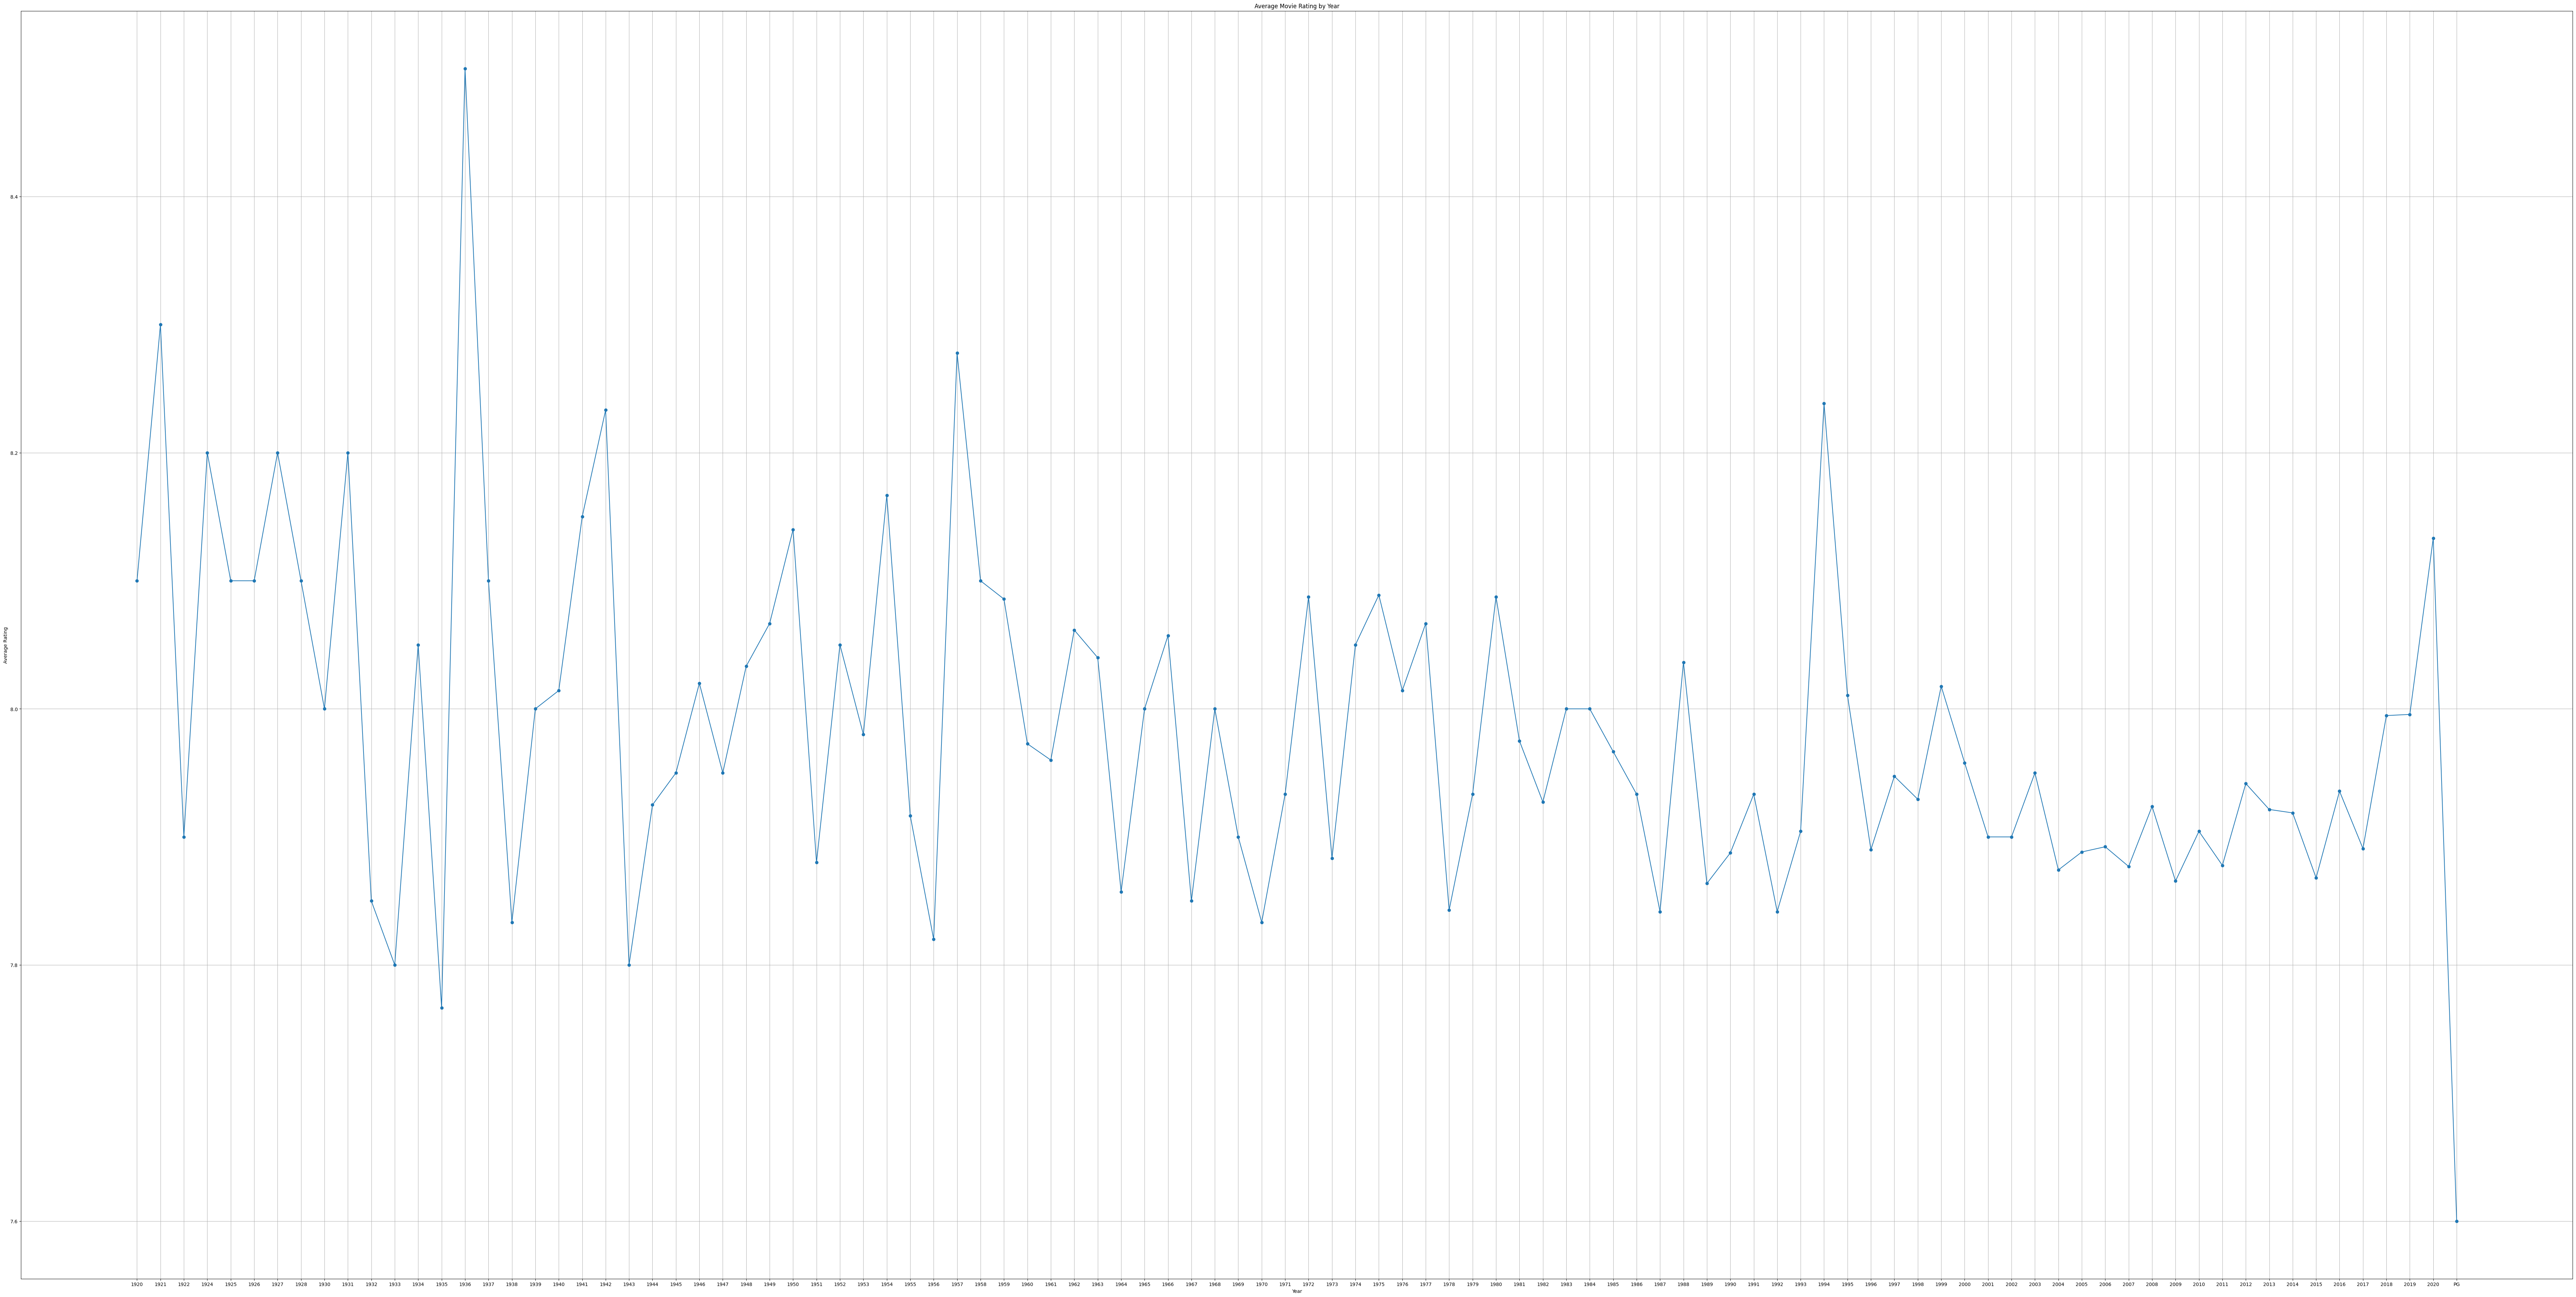

In [14]:

#pandas to handle dataset,sqlite3 for  working with db,matplotlib.pyplot for data visualization
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

#loading dataset in dataframe(df)

df=pd.read_csv("IMDbmovies.csv")
print("Dataset loaded.The first five rows: ")
print(df.head())#head()-to print first five rows

#making connection to sqlite 3 and creating a temporary memory(which closes at the end) using the string ":memory:" passed in
#the sqlite3.connect()function
#to_sql coverts the file into sql and should pass the table name(movies),place to store(connection-memory object)
#and also not saving the index of the dataframe as separate column
connection=sqlite3.connect(':memory:')
df.to_sql('movies',connection,index="false")

#providing a query and using the function pd.read_sql_query(query,connection) and the parameters query from he database present in the connection memory..
query='''
SELECT Series_Title,IMDB_Rating
FROM movies
ORDER BY IMDB_Rating DESC
LIMIT 5'''
top_movies=pd.read_sql_query(query,connection)
print("The Top Five Movies: ")
print(top_movies)

#selecting top 10 recent movies
query='''
SELECT Series_Title,IMDB_Rating,Released_Year
FROM movies
WHERE Released_year>2010 and IMDB_Rating>8
ORDER BY IMDB_Rating DESC
LIMIT 10'''
recent_movies=pd.read_sql_query(query,connection)
print("The Top 10 Recent Movies: ")
print(recent_movies)

#data visualization..calculate the average rating for a year
yearly_avg=df.groupby("Released_Year")["IMDB_Rating"].mean()
plt.figure(figsize=(96,48))#figure()-creates a figure figsize=()-of general size (12,6)
plt.plot(yearly_avg.index,yearly_avg.values,marker='o')#to plot x,y coordinates laong with marker value
plt.title("Average Movie Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)#to have grid lines
plt.show()


In [7]:
!pwd



/content
